# STEAM VIDEO GAMES RECOMMENDATION SYSTEM

we need to recommend the similar games to the user based on their behaviour

#About dataset
This dataset is a list of user behaviors, with columns: user-id, game-title, behavior-name, value. The behaviors included are 'purchase' and 'play'. The value indicates the degree to which the behavior was performed - in the case of 'purchase' the value is always 1, and in the case of 'play' the value represents the number of hours the user has played the game.

steam-200k - (199999, 5)

# Columns in dataset
user-id

game-title

behavior-name

value

0

Mounted at /content/drive


In [2]:
# import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import cosine similarity


In [21]:
# Read csv file using pandas
steam_data = pd.read_csv('/content/steam-200k.csv')
steam_data.head()

,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0


# EDA

In [22]:
# remane the column name as games user_id, hoursplay and status
steam_data = steam_data.rename(columns={"151603712": "User_ID", "The Elder Scrolls V Skyrim":"games", "purchase":"Status", "1.0":"Hoursplay"})

In [23]:
steam_data.head()

,User_ID,games,Status,Hoursplay,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0


In [24]:
#drop 0 column
steam_data = steam_data.drop('0', axis=1)

In [25]:
#drop duplicate user_id and games keep the last one
steam_data.duplicated().sum()

707

In [26]:
steam_data = steam_data.drop_duplicates()

In [27]:
#check the shape of the dataset
steam_data.shape

(199292, 4)

In [28]:
#check columns of the dataset
steam_data.columns

Index(['User_ID', 'games', 'Status', 'Hoursplay'], dtype='object')

In [29]:
# Check which columns are having categorical, numerical or boolean values of dataset
steam_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199292 entries, 0 to 199998
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   User_ID    199292 non-null  int64  
 1   games      199292 non-null  object 
 2   Status     199292 non-null  object 
 3   Hoursplay  199292 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 7.6+ MB


In [30]:
# Check for missing values in all the columnns of the train_dataset
steam_data.isnull().sum()

User_ID      0
games        0
Status       0
Hoursplay    0
dtype: int64

In [31]:
# get how many unique values are in games column of dataset
steam_data['games'].value_counts()

Dota 2                             9682
Team Fortress 2                    4646
Counter-Strike Global Offensive    2789
Unturned                           2632
Left 4 Dead 2                      1752
                                   ... 
Putt-Putt Joins the Parade            1
Ducati World Championship             1
Chunk of Change Knight                1
STASIS                                1
Soccertron                            1
Name: games, Length: 5155, dtype: int64

In [32]:
# get the total count of play and total count of purchase
steam_data['Status'].value_counts()

purchase    128803
play         70489
Name: Status, dtype: int64

In [33]:
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns  
steam_data.describe()

,User_ID,Hoursplay
count,1.992920e+05,199292.000000
mean,1.037179e+08,17.934332
std,7.212058e+07,138.298294
min,5.250000e+03,0.100000
25%,4.738430e+07,1.000000
50%,8.691201e+07,1.000000
75%,1.542309e+08,1.400000
max,3.099031e+08,11754.000000


## visualizing data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c8c4e94d0>,
      dtype=object)

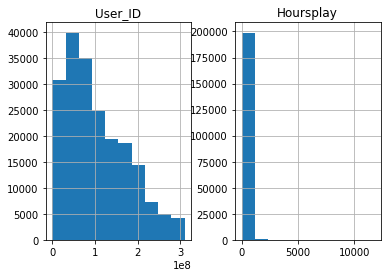

In [34]:
# Histogram using pandas 
steam_data.hist()

Text(0, 0.5, 'Status')

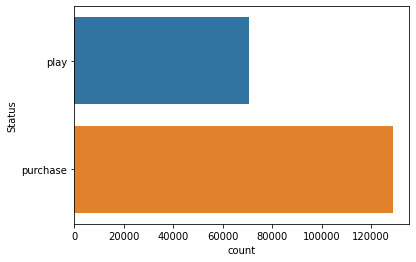

In [41]:
# plot a horizontal bar plot of column status
#steam_order = steam_data['Status'].value_counts()
sns.countplot(data=steam_data, y='Status')
plt.xlabel('count')
plt.ylabel('Status')

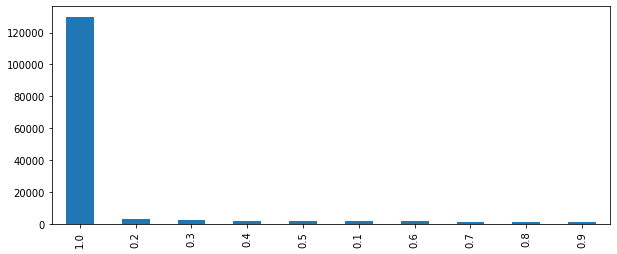

In [27]:
#plot a count plot of hoursplay column
steam_data['Hoursplay'].value_counts().head(10).plot(kind='bar', figsize=(10,4))

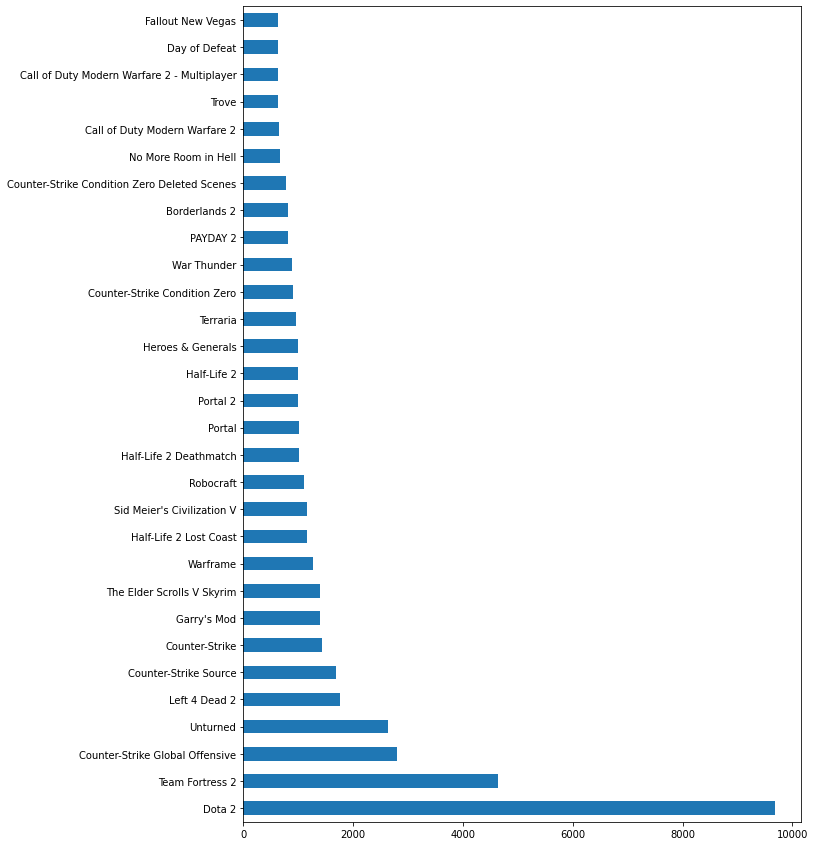

In [32]:
# plot a horizontal bar plot of games column for top 30 games
steam_data['games'].value_counts().head(30).plot(kind='barh', figsize=(10,15))

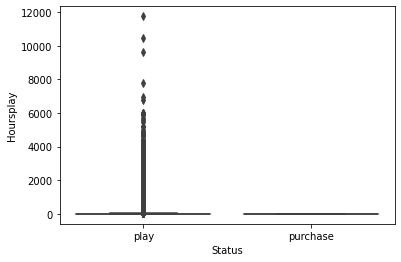

In [47]:
# plot a boxplot of status as x-axis and hoursplay as y-axis
sns.boxplot(x='Status', y='Hoursplay', data=steam_data)

# converting hours to rating

In [48]:
# comvert the hoursplay into rating
steam_data = steam_data[(steam_data['Hoursplay'] >= 2) & (steam_data['Status']=='play')]

In [50]:
steam_data = steam_data[steam_data.groupby('games').User_ID.transform(len)>=20]

In [51]:
steam_data['games'].nunique()

431

In [52]:
steam_data['User_ID'] = steam_data['User_ID'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
Average = steam_data.groupby(['games'], as_index=False).Hoursplay.mean()

In [54]:
Average['Avg_Hoursplay'] = Average['Hoursplay']
Average.drop(columns='Hoursplay', inplace=True)

In [55]:
Average.head()

,games,Avg_Hoursplay
0,7 Days to Die,50.777500
1,APB Reloaded,113.377778
2,ARK Survival Evolved,105.982812
3,Ace of Spades,10.971739
4,AdVenture Capitalist,67.760674


In [56]:
steam_data = steam_data.merge(Average, on='games')

In [57]:
condition = [
    steam_data['Hoursplay'] >= (0.8*steam_data['Avg_Hoursplay']),
    (steam_data['Hoursplay'] >= 0.6*steam_data['Avg_Hoursplay']) & (steam_data['Hoursplay']<0.8*steam_data['Avg_Hoursplay']),
    (steam_data['Hoursplay']>= 0.4*steam_data['Avg_Hoursplay']) & (steam_data['Hoursplay']<0.6*steam_data['Avg_Hoursplay']),
    (steam_data['Hoursplay']>= 0.2*steam_data['Avg_Hoursplay']) & (steam_data['Hoursplay']<0.4*steam_data['Avg_Hoursplay']),
    steam_data['Hoursplay'] > 0

]

values = [5,4,3,2,1]

steam_data['rating'] = np.select(condition, values)

In [58]:
steam_data.head()

,User_ID,games,Status,Hoursplay,Avg_Hoursplay,rating
0,151603712,The Elder Scrolls V Skyrim,play,273.0,115.351792,5
1,59945701,The Elder Scrolls V Skyrim,play,58.0,115.351792,3
2,92107940,The Elder Scrolls V Skyrim,play,110.0,115.351792,5
3,250006052,The Elder Scrolls V Skyrim,play,465.0,115.351792,5
4,11373749,The Elder Scrolls V Skyrim,play,220.0,115.351792,5


In [59]:
# keep only important columns( user_id, games,rating ) drop everthing else 
steam_data = steam_data.drop(['Status','Hoursplay','Avg_Hoursplay'], axis=1)

In [60]:
steam_data.head()

,User_ID,games,rating
0,151603712,The Elder Scrolls V Skyrim,5
1,59945701,The Elder Scrolls V Skyrim,3
2,92107940,The Elder Scrolls V Skyrim,5
3,250006052,The Elder Scrolls V Skyrim,5
4,11373749,The Elder Scrolls V Skyrim,5


# MEMORY BASED COLLABORATIVE FILTERING

Memory-based algorithms approach the collaborative filtering problem by using the entire database.It tries to find users that are similar to the active user (i.e. the users we want to make predictions for), and uses their preferences to predict ratings for the active user.

In [61]:
#import pairwise_distances, cosine, corelation
from sklearn.metrics.pairwise import pairwise_distances, cosine_similarity
from scipy.spatial.distance import cosine, correlation 

In [62]:
# create pivot table containing user_id as index, games as columns, ratings as values
PT = steam_data.pivot_table(index=['User_ID'], columns=['games'], values='rating')

In [63]:
PT = PT.apply(lambda x :(x-np.mean(x))/((np.max(x))-np.min(x)), axis=1)

In [65]:
#check shape of pivot table
PT.shape

(8315, 431)

In [66]:
#check first five rows of pivot table

PT.head()

games,7 Days to Die,APB Reloaded,ARK Survival Evolved,Ace of Spades,AdVenture Capitalist,Aftermath,Age of Chivalry,Age of Empires II HD Edition,Age of Empires III Complete Collection,Age of Mythology Extended Edition,...,"Warhammer 40,000 Dawn of War II - Chaos Rising","Warhammer 40,000 Space Marine",Wasteland 2,Watch_Dogs,Wolfenstein The New Order,Worms Reloaded,Worms Revolution,XCOM Enemy Unknown,Zombie Panic Source,theHunter
User_ID,,,,,,,,,,,,,,,,,,,,,
100053304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100057229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100070732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100096071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100168166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
## Note: As we are subtracting the mean from each rating to standardize
##all users with only one rating or who had rated everything the same will be dropped
# Normalize the values in pivot table

PT = PT.fillna(0)
PT = PT.T

# Drop all columns containing only zeros representing users who did not rate
PT = PT.loc[:,(PT!=0).any(axis=0)]

In [68]:
PT.head()

User_ID,100057229,100096071,100311267,100322840,100351493,100359523,100431715,100444456,100519466,100630947,...,994489,9946133,99484728,99640715,99704390,99711581,99713453,99723205,99766416,99802512
games,,,,,,,,,,,,,,,,,,,,,
7 Days to Die,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0
APB Reloaded,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,-0.475,-0.166667,0.0,0.0,0.0,0.0
ARK Survival Evolved,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.43,0.0,...,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0
Ace of Spades,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0
AdVenture Capitalist,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0


In [69]:
# import scipy, operator
import scipy as sp
import operator

In [72]:
# convert the data into sparse matrix format to be read by the following functions

PT_spare = sp.sparse.csr_matrix(PT.values)

In [73]:
# create matrices to show the computed cosine similarity values between each user/user array pair and item/item array pair.
item_simi = cosine_similarity(PT_spare)
user_simi = cosine_similarity(PT_spare.T)


In [74]:
# Inserting the similarity matricies into dataframe objects

#item similarity dataframe
df_item = pd.DataFrame(item_simi, index=PT.index, columns=PT.index)
#user similarity dataframe
df_user = pd.DataFrame(user_simi, index=PT.columns, columns=PT.columns)

In [75]:
df_item.head()

games,7 Days to Die,APB Reloaded,ARK Survival Evolved,Ace of Spades,AdVenture Capitalist,Aftermath,Age of Chivalry,Age of Empires II HD Edition,Age of Empires III Complete Collection,Age of Mythology Extended Edition,...,"Warhammer 40,000 Dawn of War II - Chaos Rising","Warhammer 40,000 Space Marine",Wasteland 2,Watch_Dogs,Wolfenstein The New Order,Worms Reloaded,Worms Revolution,XCOM Enemy Unknown,Zombie Panic Source,theHunter
games,,,,,,,,,,,,,,,,,,,,,
7 Days to Die,1.000000,0.011889,0.023910,0.003702,-0.006406,-0.036463,0.047295,0.049644,-0.003137,0.000000,...,-0.038894,0.017805,-0.027081,0.011157,0.028949,0.049210,-0.028614,0.063191,0.061200,-0.034545
APB Reloaded,0.011889,1.000000,-0.046199,-0.012738,-0.030157,-0.005157,-0.000540,-0.013881,-0.008468,0.004806,...,0.000280,0.027197,0.000000,0.000000,0.010149,-0.038028,-0.007166,-0.008280,0.024256,-0.051036
ARK Survival Evolved,0.023910,-0.046199,1.000000,-0.006097,-0.006445,0.000000,0.023592,0.008420,-0.020514,-0.009609,...,-0.031033,0.000214,-0.014996,0.022721,0.000000,-0.023283,0.000231,0.001994,0.028022,-0.015766
Ace of Spades,0.003702,-0.012738,-0.006097,1.000000,-0.003154,0.000000,-0.034444,-0.006776,0.000000,0.000000,...,0.000858,-0.022283,0.000000,0.000000,0.000000,0.050384,0.053498,0.009763,-0.022023,-0.029286
AdVenture Capitalist,-0.006406,-0.030157,-0.006445,-0.003154,1.000000,-0.043081,0.035806,-0.029016,-0.002733,0.000000,...,0.019090,0.008819,0.000000,0.000000,-0.003790,0.000000,0.014821,-0.014461,0.000000,0.086266


In [77]:
df_user.head()

User_ID,100057229,100096071,100311267,100322840,100351493,100359523,100431715,100444456,100519466,100630947,...,994489,9946133,99484728,99640715,99704390,99711581,99713453,99723205,99766416,99802512
User_ID,,,,,,,,,,,,,,,,,,,,,
100057229,1.000000,-0.102897,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.112023,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,-0.074536,0.000000,0.052849,0.000000,0.0
100096071,-0.102897,1.000000,0.049862,0.0,0.000000,0.0,0.067894,0.000000,-0.154673,-0.186033,...,0.303790,0.036035,0.000000,0.0,-0.150648,-0.046017,0.000000,0.013983,0.039199,0.0
100311267,0.000000,0.049862,1.000000,0.0,-0.004669,0.0,0.000000,-0.030655,0.178706,0.000000,...,-0.054711,0.280644,0.032827,0.0,-0.035141,0.645942,0.000000,-0.128874,0.000000,0.0
100322840,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.259037,0.000000,0.204124,0.000000,0.000000,0.0
100351493,0.000000,0.000000,-0.004669,0.0,1.000000,0.0,0.172433,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [80]:
# write a function which will return the top 10 games with the highest cosine similarity value

def top_games(game):
  count=1
  print('Similar game to {} include : \n'.format(game))
  for item in df_item.sort_values(ascending=False, by=game).index[1:11]:
    print('No. {} = {}'.format(count, item))
    count+=1


In [81]:
top_games('Aftermath')

Similar game to Aftermath include : 

No. 1 = Alice Madness Returns
No. 2 = Shadow Warrior
No. 3 = Brtal Legend
No. 4 = Resident Evil 5 / Biohazard 5
No. 5 = Infestation Survivor Stories
No. 6 = Call of Juarez Gunslinger
No. 7 = The Walking Dead Season Two
No. 8 = Grand Theft Auto Vice City
No. 9 = Counter-Strike Nexon Zombies
No. 10 = Star Conflict


In [82]:
# check the column of pivot table
PT.columns

Index(['100057229', '100096071', '100311267', '100322840', '100351493',
       '100359523', '100431715', '100444456', '100519466', '100630947',
       ...
       '994489', '9946133', '99484728', '99640715', '99704390', '99711581',
       '99713453', '99723205', '99766416', '99802512'],
      dtype='object', name='User_ID', length=3059)

In [83]:
# write a function which will return the top 5 users with the highest similarity value 
def user_id(user):
  if user not in PT.columns:
    print('No data available for this user {}'.format(user))
  
  sim_val = df_user.sort_values(by =user,ascending=False).loc[:,user].tolist()[1:6]
  sim_user = df_user.sort_values(by = user,ascending=False).index[1:6]
  zipped = zip(sim_user,sim_val)
  for user, sim in zipped:
    print('user #{0},similarity values :{1:.2f}'.format(user,sim))



In [85]:
user_id('99484728')

user #40289887,similarity values :0.73
user #185494712,similarity values :0.71
user #16710264,similarity values :0.71
user #20566124,similarity values :0.67
user #49769103,similarity values :0.67


In [86]:
from numpy.core.fromnumeric import ptp
# write a function which constructs a list of lists containing the highest rated games per similar user
# and returns the name of the game along with the frequency it appears in the list

def simi_user_recs(user):
    if user not in PT.columns:
        print('No data available for this user {}'.format(user))
    sim_user = df_user.sort_values(by = user,ascending=False).index[1:11]
    best = []
    most_common = {}
    for i in sim_user:
        max_scorce = PT.loc[:,i].max()
        best.append(PT[PT.loc[:,i] == max_scorce].index.tolist())
    for i in range(len(best)):
        for j in best[i]:
                   if j in most_common:
                       most_common[j] =+1
                   else :
                       most_common[j] =1
    sorted_item = sorted(most_common.items(),key=operator.itemgetter(1),reverse=True)
    return sorted_item[:6]

In [88]:
simi_user_recs('100519466')


[('Robocraft', 1),
 ('BLOCKADE 3D', 1),
 ("Garry's Mod", 1),
 ('ARK Survival Evolved', 1),
 ('Dino D-Day', 1),
 ('AdVenture Capitalist', 1)]

# COLLABORATIVE FILTERING USING KNN

Collaborative Filtering Using k-Nearest Neighbors (kNN). kNN is a machine learning algorithm to find clusters of similar users based on common ratings, and make predictions using the average rating of top-k nearest neighbors.

https://datascienceplus.com/building-a-book-recommender-system-the-basics-knn-and-matrix-factorization/

In [89]:
# import NearestNeighbors
from sklearn.neighbors import NearestNeighbors
#make an object for the NearestNeighbors Class.
KNN = NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine', n_jobs=-1, n_neighbors=20)
# fit the dataset
KNN.fit(PT)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)


Test model and make some recommendations:

In [90]:
# choose random game
qurry = np.random.choice(PT.shape[0])
# print the name of random game
print('Choosen game is :',PT.index[qurry])

# use kNN algorithm to measures distance to determine the closeness of instances.
distance , indices = KNN.kneighbors(PT.iloc[qurry,:].values.reshape(1,-1),n_neighbors=6)

# pick most popular games among the neighbors and print their names
for i in range(0,len(distance.flatten())):
    if i == 0:
        print('Recommendation for {0} \n'.format(PT.index[qurry]))
    else:
        print('{0} : {1} with distance of {2}'.format(i,PT.index[indices.flatten()[i]], distance.flatten()[i]))


Choosen game is : Call of Duty Black Ops III
Recommendation for Call of Duty Black Ops III 

1 : Spelunky with distance of 0.8913790927643311
2 : Call of Duty Advanced Warfare - Multiplayer with distance of 0.9033611324917568
3 : BioShock with distance of 0.9172374796425349
4 : Kerbal Space Program with distance of 0.9195048485556988
5 : Saints Row 2 with distance of 0.9241116999209372


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  "X does not have valid feature names, but"


#Conclusion

We can use different different methods based on our problem statement and dataset. Here we used collaborative filtering technique to recommend games.We can use this method to recommend alot of other things as well such as music, movies, books, news etc. 